In [7]:
import json
from lxml import html
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'http://volcano.oregonstate.edu/oldroot/volcanoes/alpha.html'
xpath = '//table'

tree = html.parse(url)
tables = tree.xpath(xpath)

table_dfs = []

for idx in range(4, len(tables)):
    df = pd.read_html(html.tostring(tables[idx]),header=0)[0]
    table_dfs.append(df)
    
df_volc = pd.concat(table_dfs,ignore_index=True)
print(len(df_volc))
print(df_volc.head(10))

df_volc['Location'].str.contains('Philippines').value_counts()
df_volc['Type'].value_counts()

1560
              Name              Location               Type  Latitude  \
0              Abu          Honshu-Japan   Shield volcanoes     34.50   
1       Acamarachi               Chile-N      Stratovolcano    -23.30   
2       Acatenango             Guatemala      Stratovolcano     14.50   
3  Acigöl-Nevsehir                Turkey            Caldera     38.57   
4            Adams         US-Washington      Stratovolcano     46.21   
5  Adams  Seamount             Pacific-C  Submarine volcano    -25.37   
6          Adatara          Honshu-Japan    Stratovolcanoes     37.64   
7             Adwa              Ethiopia      Stratovolcano     10.07   
8           Afderà              Ethiopia      Stratovolcano     13.08   
9          Agrigan  Mariana Is-C Pacific      Stratovolcano     18.77   

   Longitude  Elevation (m)  
0     131.60          641.0  
1     -67.62         6046.0  
2     -90.88         3976.0  
3      34.52         1689.0  
4    -121.49         3742.0  
5    -129.2

Stratovolcano           601
Shield volcano          121
Stratovolcanoes         109
Submarine volcano        95
Volcanic field           82
Caldera                  78
Cinder cones             62
Complex volcano          49
Shield volcanoes         31
Pyroclastic cones        30
Lava domes               26
Submarine volcano ?      19
Shield  volcano          16
Submarine  volcano       16
Fissure vents            16
Volcanic  field          16
Maars                    12
Cinder  cones            10
Compound volcano         10
Cinder cone               9
Lava dome                 9
Calderas                  9
Pyroclastic cone          8
Tuff cones                7
Maar                      7
Scoria cones              7
Complex  volcano          6
Unknown                   6
Somma volcano             5
Lava  domes               5
                       ... 
Fissure vent              2
Pumice cones              2
Fissure  vents            2
Stratovolcano ?           2
Cinder  cone        

In [13]:
def cleanup_type(s):
    if not isinstance(s,str):
        return s
    s = s.replace('?',"").replace('  ',' ')
    s = s.replace('volcanoes','volcano')
    s = s.replace('volcanoe','volcano')
    s = s.replace('cones','cone')
    s = s.replace('Calderas','Caldera')
    return s.strip().title()

df_volc['Type'] = df_volc['Type'].map(cleanup_type)
s = df_volc['Type'].value_counts()

df_volc.dropna(inplace=True)
len(df_volc)


1513

In [21]:
def plot_map(lons, lats, elevations, projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='l', min_marker_size=2):

    bins = np.linspace(0, elevations.max(), 10)
    marker_sizes = np.digitize(elevations, bins) + min_marker_size

    map = Basemap(projection=projection, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution=resolution)
    map.drawcoastlines()
    map.drawmapboundary()
    map.fillcontinents(color = '#333333')

    for lon, lat, msize in zip(lons, lats, marker_sizes):
        x, y = map(lon, lat)
        map.plot(x, y, '^r', markersize=msize, alpha=.7)

    return map

C:\Users\John Vincent\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\John Vincent\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


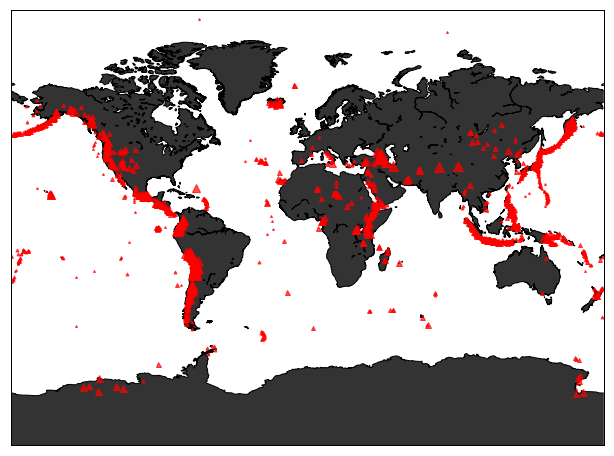

In [30]:
plt.figure(figsize=(18,8))
df = df_volc
plot_map(df['Longitude'],df['Latitude'],df['Elevation (m)'])
plt.show()